#                     Air Quality Index Prediction using ML                   

Step1 : Importing all Necessary Libraries

In [161]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [162]:
df =pd.read_csv('cities_by_day.csv',parse_dates=['Date'])

In [163]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


Step2 : Preprocessing in City_day Dataset

In [164]:
 df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [165]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8', 'C8H10', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [166]:
df.shape

(29531, 16)

In [167]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [168]:
df.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
C6H6                 float64
C7H8                 float64
C8H10                float64
AQI                  float64
AQI_Bucket            object
dtype: object

<AxesSubplot:xlabel='AQI', ylabel='City'>

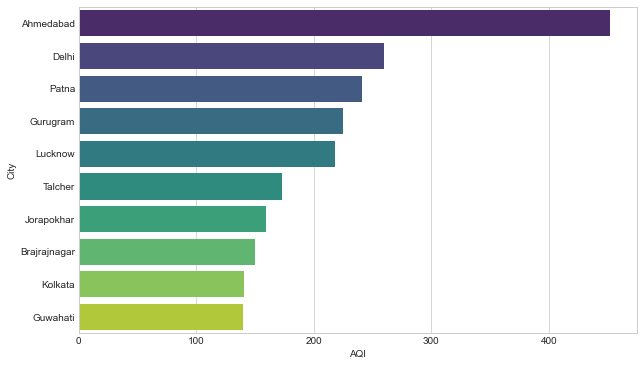

In [169]:
#Grouping the AQI by city and calculating the average AQI per city
x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(data=x,x='AQI',y='City',orient='h',palette='viridis')

Ahmedabad has highest AQI Index Value..

In [170]:
#segregating dates into months and years

df['Month']=df.Date.dt.month.astype(str)
df['Year']=df.Date.dt.year.astype(str)

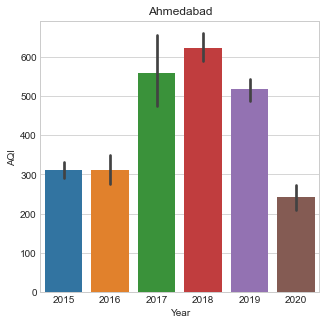

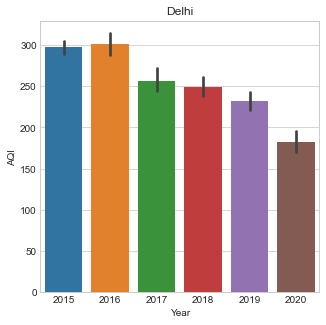

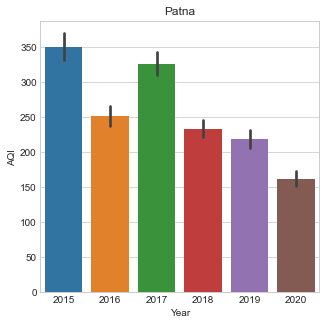

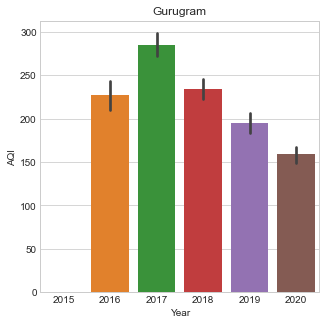

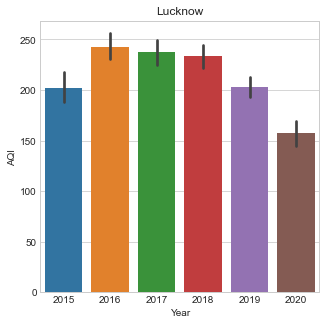

In [171]:
#plotting the average AQI over the years for top 5 cities which have AQI greater than 500

df['City'][df['AQI']>=200].value_counts()

cols=['Ahmedabad','Delhi','Patna','Gurugram','Lucknow']

for col in cols:
    plt.figure(figsize=(5,5))
    x=df[df['City']==col]
    sns.barplot(x='Year',y='AQI',data=x)
    plt.title(col)

In [172]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8', 'C8H10', 'AQI', 'AQI_Bucket', 'Month', 'Year'],
      dtype='object')

# Detecting Missing Values

In [173]:
def missing_value(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [174]:
missing_value(df)

Your selected dataframe has 18 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
C8H10,18109,61.3
PM10,11140,37.7
NH3,10328,35.0
C7H8,8041,27.2
C6H6,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6


C8H10 have more than 50% missing values

# Visualizing Missing Values

<AxesSubplot:>

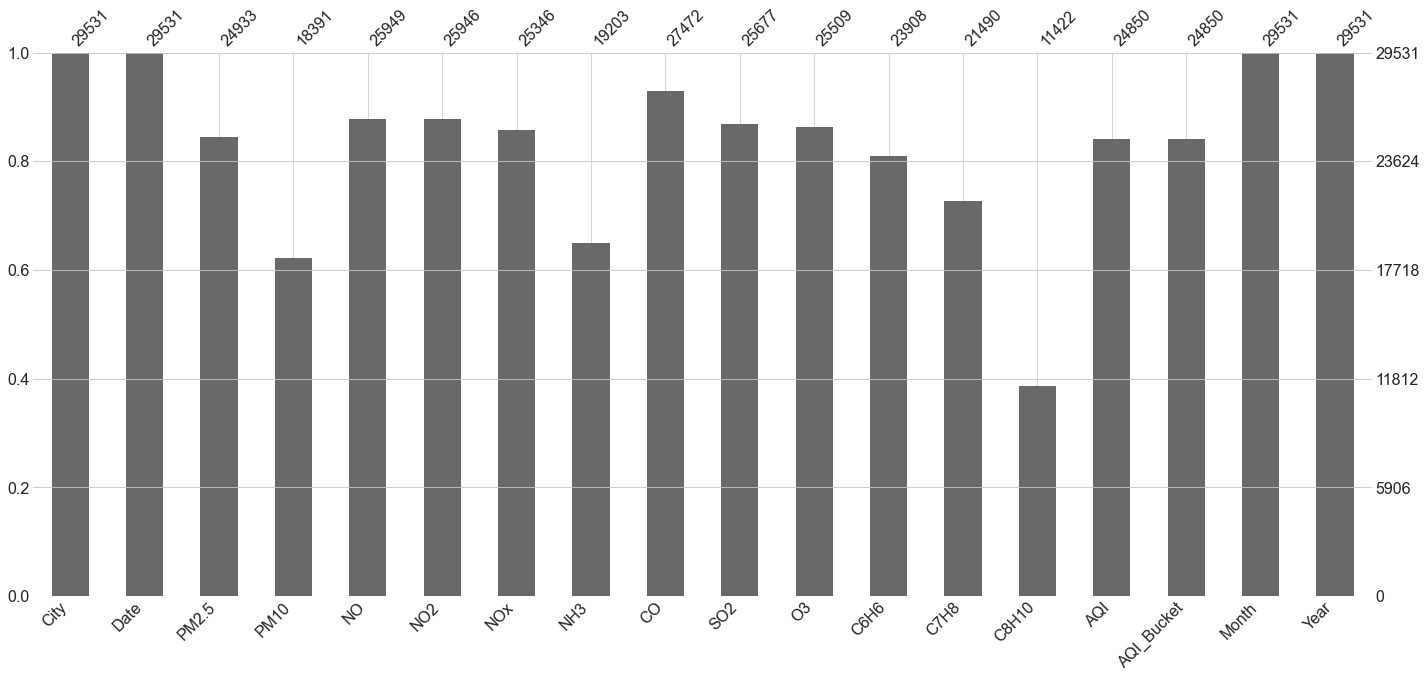

In [175]:
msno.bar(df)

We can see except City and Date all columns have missing values

<AxesSubplot:>

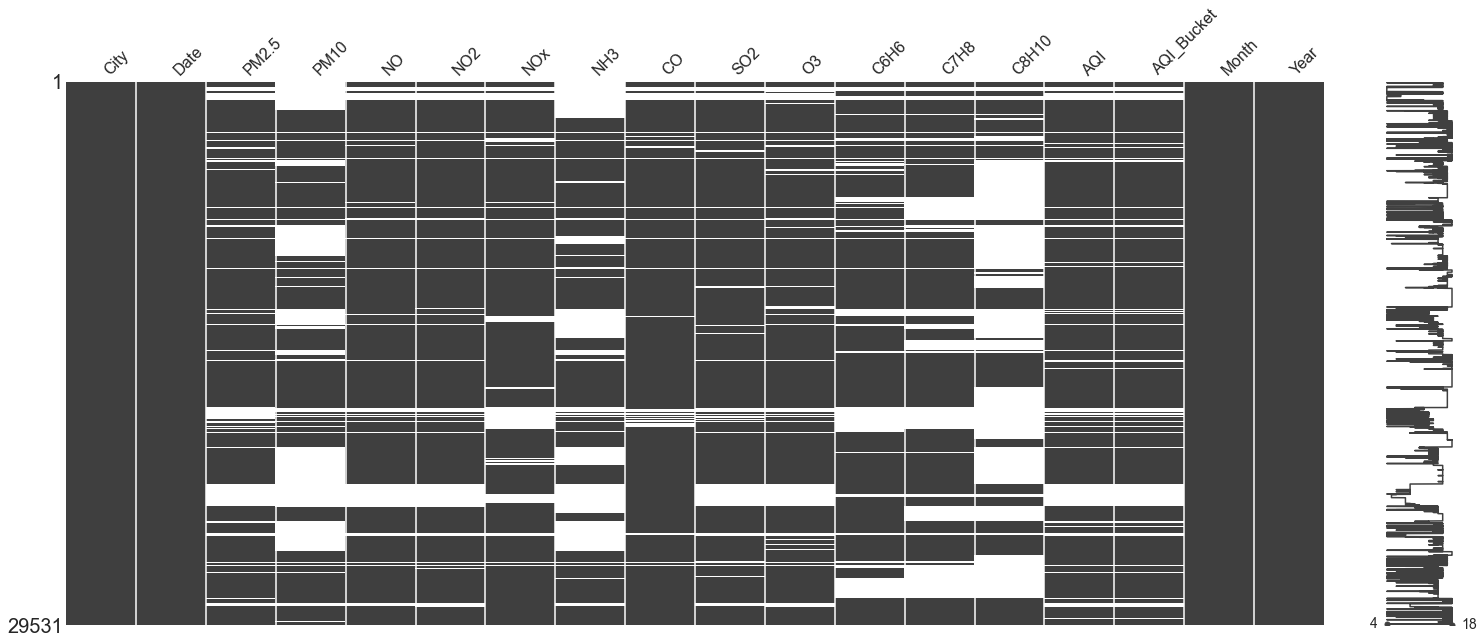

In [176]:
msno.matrix(df)

<AxesSubplot:>

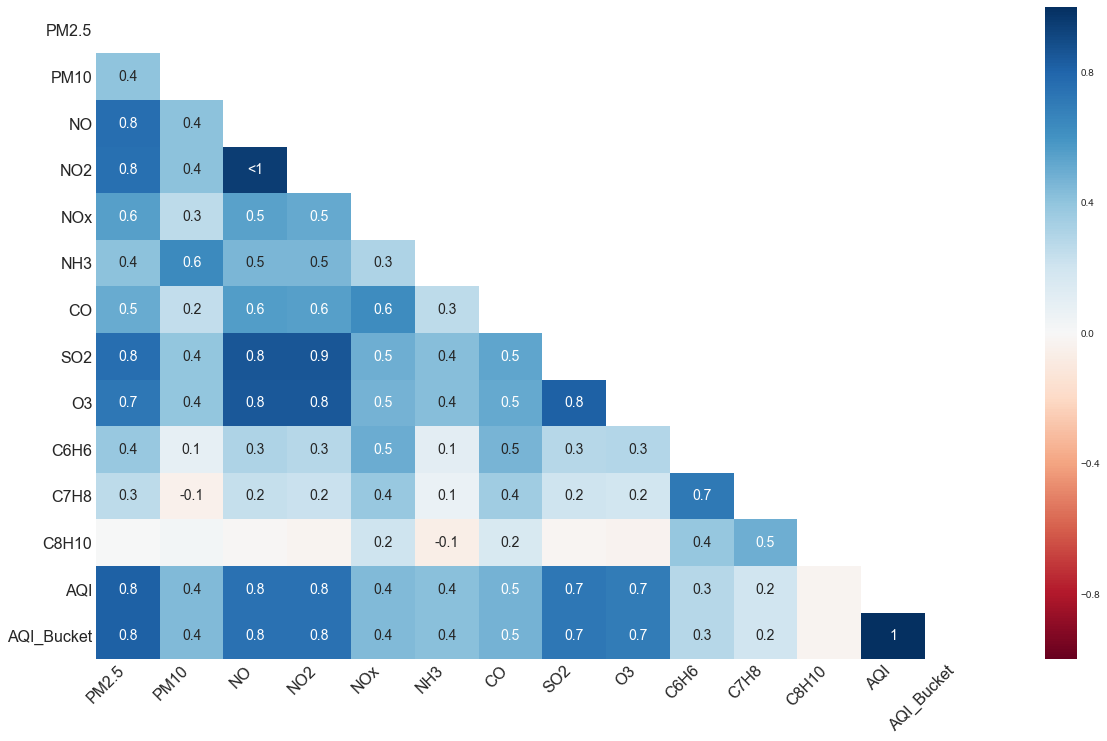

In [177]:
msno.heatmap(df)

<AxesSubplot:>

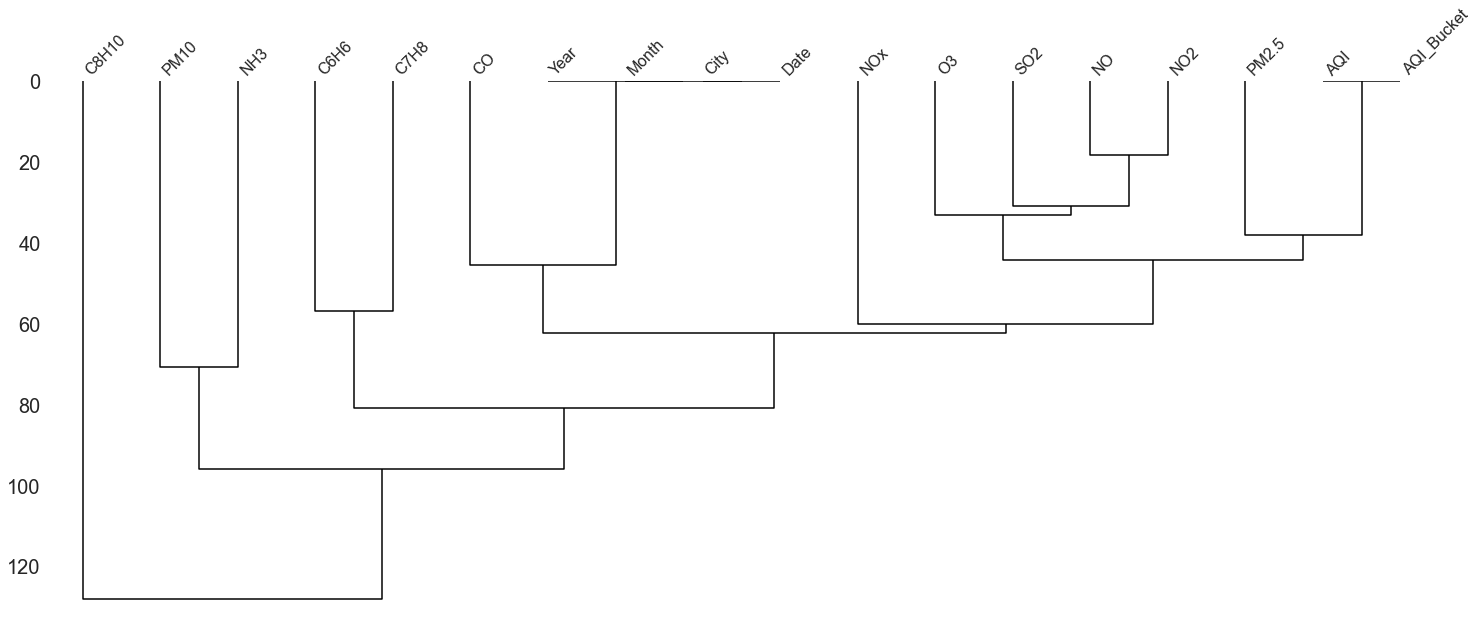

In [178]:
msno.dendrogram(df)

In [179]:
df.tail(30)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,Month,Year
29501,Visakhapatnam,2020-06-02,9.91,43.30,2.81,19.91,12.60,9.16,0.47,8.78,19.68,1.37,3.44,0.73,50.0,Good,6,2020
29502,Visakhapatnam,2020-06-03,17.94,102.58,5.60,30.32,20.59,9.49,0.58,6.48,23.82,2.65,7.59,1.23,88.0,Satisfactory,6,2020
29503,Visakhapatnam,2020-06-04,19.14,77.06,4.12,35.57,22.18,8.82,0.68,7.19,25.56,3.06,8.18,1.61,71.0,Satisfactory,6,2020
29504,Visakhapatnam,2020-06-05,29.71,112.53,2.98,44.77,24.69,10.51,0.85,10.64,21.94,4.50,18.10,1.62,93.0,Satisfactory,6,2020
29505,Visakhapatnam,2020-06-06,21.66,74.97,3.38,38.42,22.56,8.63,0.64,7.02,28.86,2.57,11.54,1.40,101.0,Moderate,6,2020
29506,Visakhapatnam,2020-06-07,29.69,101.97,2.84,35.51,20.66,9.85,0.57,5.32,31.71,3.07,10.65,1.17,82.0,Satisfactory,6,2020
29507,Visakhapatnam,2020-06-08,31.14,125.15,6.55,41.56,27.26,9.71,0.64,6.61,36.65,3.47,9.76,1.78,115.0,Moderate,6,2020
29508,Visakhapatnam,2020-06-09,31.84,85.41,4.69,50.11,30.35,10.01,0.88,5.06,33.86,4.07,9.24,2.52,96.0,Satisfactory,6,2020
29509,Visakhapatnam,2020-06-10,32.55,79.28,4.78,44.59,27.38,9.34,0.69,5.90,35.06,2.96,7.89,2.08,92.0,Satisfactory,6,2020
29510,Visakhapatnam,2020-06-11,37.71,98.53,9.97,52.10,35.79,9.91,0.70,5.59,26.59,5.29,10.38,3.38,90.0,Satisfactory,6,2020


In [180]:
'''from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
city_day['City']=label_encoder.fit_transform(city_day['City'])
city_day['City'].unique()'''


"from sklearn import preprocessing\nlabel_encoder=preprocessing.LabelEncoder()\ncity_day['City']=label_encoder.fit_transform(city_day['City'])\ncity_day['City'].unique()"

In [181]:
df['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [182]:
#city_day['AQI_Bucket']=city_day['AQI_Bucket'].map({'Good':0,'Satisfactory':1,'Moderate':2,'Poor':3,'Very Poor':4,'Severe':5})
#city_day.head(10)

In [183]:
df.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
C6H6                 float64
C7H8                 float64
C8H10                float64
AQI                  float64
AQI_Bucket            object
Month                 object
Year                  object
dtype: object

<AxesSubplot:>

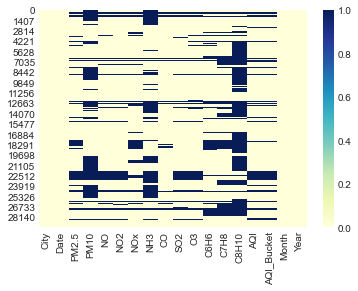

In [184]:
sns.heatmap(df.isnull(),cmap="YlGnBu")

In [185]:
df.iloc[:,1:14]=df.groupby("City").transform(lambda x:x.fillna(x.mean()))

In [186]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,Month,Year
0,Ahmedabad,2015-01-01,67.854497,114.584029,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1,2015
1,Ahmedabad,2015-01-02,67.854497,114.584029,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1,2015
2,Ahmedabad,2015-01-03,67.854497,114.584029,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1,2015
3,Ahmedabad,2015-01-04,67.854497,114.584029,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1,2015
4,Ahmedabad,2015-01-05,67.854497,114.584029,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1,2015


In [187]:
df.isnull().sum()

City              0
Date              0
PM2.5             0
PM10           2009
NO                0
NO2               0
NOx            1169
NH3            2009
CO                0
SO2               0
O3              162
C6H6           2732
C7H8           4010
C8H10         13047
AQI            4681
AQI_Bucket     4681
Month             0
Year              0
dtype: int64

<AxesSubplot:>

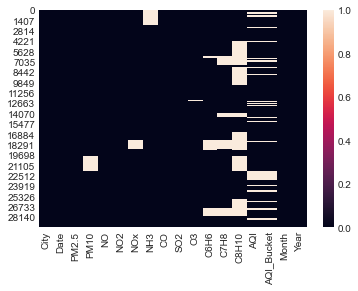

In [188]:
sns.heatmap(df.isnull())

In [189]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,Month,Year
0,Ahmedabad,2015-01-01,67.854497,114.584029,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1,2015
1,Ahmedabad,2015-01-02,67.854497,114.584029,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1,2015
2,Ahmedabad,2015-01-03,67.854497,114.584029,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1,2015
3,Ahmedabad,2015-01-04,67.854497,114.584029,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1,2015
4,Ahmedabad,2015-01-05,67.854497,114.584029,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1,2015


<AxesSubplot:>

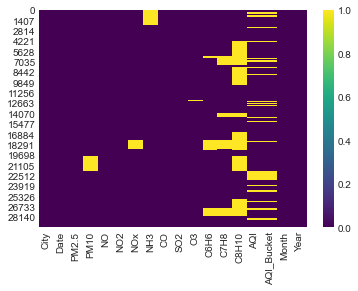

In [190]:
sns.heatmap(df.isnull(),cmap="viridis")

In [191]:
df.isnull().sum()

City              0
Date              0
PM2.5             0
PM10           2009
NO                0
NO2               0
NOx            1169
NH3            2009
CO                0
SO2               0
O3              162
C6H6           2732
C7H8           4010
C8H10         13047
AQI            4681
AQI_Bucket     4681
Month             0
Year              0
dtype: int64

In [192]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,Month,Year
0,Ahmedabad,2015-01-01,67.854497,114.584029,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1,2015
1,Ahmedabad,2015-01-02,67.854497,114.584029,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1,2015
2,Ahmedabad,2015-01-03,67.854497,114.584029,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1,2015
3,Ahmedabad,2015-01-04,67.854497,114.584029,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1,2015
4,Ahmedabad,2015-01-05,67.854497,114.584029,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1,2015


In [193]:
#df.iloc[:,:3:14]=df.fillna(df.iloc[:,3:14].mean())
df['PM10']=df['PM10'].fillna((df['PM10'].mean()))
df['NOx']=df['NOx'].fillna((df['NOx'].mean()))
df['NH3']=df['NH3'].fillna((df['NH3'].mean()))
df['O3']=df['O3'].fillna((df['O3'].mean()))
df['C6H6']=df['C6H6'].fillna((df['C6H6'].mean()))
df['C7H8']=df['C7H8'].fillna((df['C7H8'].mean()))
df['C8H10']=df['C8H10'].fillna((df['C8H10'].mean()))

In [194]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket,Month,Year
0,Ahmedabad,2015-01-01,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1,2015
1,Ahmedabad,2015-01-02,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1,2015
2,Ahmedabad,2015-01-03,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1,2015
3,Ahmedabad,2015-01-04,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1,2015
4,Ahmedabad,2015-01-05,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1,2015


In [195]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
C6H6             0
C7H8             0
C8H10            0
AQI           4681
AQI_Bucket    4681
Month            0
Year             0
dtype: int64

In [196]:
#Imputation of AQI Values

In [197]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
C6H6             0
C7H8             0
C8H10            0
AQI           4681
AQI_Bucket    4681
Month            0
Year             0
dtype: int64

In [198]:

def aqi_calc(df):
  #PM2.5 (Particulate Matter 2.5-micrometer)
  #PM2.5 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:
  def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

  df["PM2.5_SubIndex"] = df["PM2.5"].apply(lambda x: get_PM25_subindex(x))


  #PM10 (Particulate Matter 10-micrometer)
  #PM10 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:
  def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

  df["PM10_SubIndex"] = df["PM10"].apply(lambda x: get_PM10_subindex(x))


  #SO2 (Sulphur Dioxide)
  #SO2 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:
  def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

  df["SO2_SubIndex"] = df["SO2"].apply(lambda x: get_SO2_subindex(x))


  #NOx (Any Nitric x-oxide)
  #NOx is measured in ppb (parts per billion). The predefined groups are defined in the function below:
  def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

  df["NOx_SubIndex"] = df["NOx"].apply(lambda x: get_NOx_subindex(x))


  #NH3 (Ammonia)
  #NH3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below: 
  def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

  df["NH3_SubIndex"] = df["NH3"].apply(lambda x: get_NH3_subindex(x))


  #CO (Carbon Monoxide)
  #CO is measured in mg / m3 (milligrams per cubic meter of air). The predefined groups are defined in the function below:
  def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

  df["CO_SubIndex"] = df["CO"].apply(lambda x: get_CO_subindex(x))


  #O3 (Ozone or Trioxygen)
  #O3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:
  def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

  df["O3_SubIndex"] = df["O3"].apply(lambda x: get_O3_subindex(x))
  

  def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

  df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NOx_SubIndex"] > 0).astype(int) + \
                (df["NH3_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int)

  df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
  df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
  df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

  df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

In [199]:
aqi_calc(df)

In [200]:
df.shape

(29531, 28)

In [201]:
df.isnull().sum()

City                        0
Date                        0
PM2.5                       0
PM10                        0
NO                          0
NO2                         0
NOx                         0
NH3                         0
CO                          0
SO2                         0
O3                          0
C6H6                        0
C7H8                        0
C8H10                       0
AQI                      4681
AQI_Bucket               4681
Month                       0
Year                        0
PM2.5_SubIndex              0
PM10_SubIndex               0
SO2_SubIndex                0
NOx_SubIndex                0
NH3_SubIndex                0
CO_SubIndex                 0
O3_SubIndex                 0
Checks                      0
AQI_calculated              0
AQI_bucket_calculated       0
dtype: int64

In [202]:
df.shape

(29531, 28)

In [203]:
df.dropna(inplace=True,axis=0)

In [204]:
df.shape

(24850, 28)

In [205]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['City']=label_encoder.fit_transform(df['City'])
df['City'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [206]:
#df['AQI_bucket_calculated']=df['AQI_calculated'].map({'Good':0,'Satisfactory':1,'Moderate':2,'Poor':3,'Very Poor':4,'Severe':5})
#city_day.head(10)

In [207]:
#df.to_csv('Neha City_day_after_AQI_Imputation.csv',index=False)

In [208]:
df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
28,0,2015-01-29,83.13,114.584029,6.93,28.71,33.72,23.024137,6.93,49.52,...,177.100000,109.722686,61.9000,42.1500,5.756034,161.625000,59.760000,7,177.0,Moderate
29,0,2015-01-30,79.84,114.584029,13.85,28.68,41.08,23.024137,13.85,48.49,...,166.133333,109.722686,60.6125,51.3500,5.756034,255.000000,97.070000,7,255.0,Poor
30,0,2015-01-31,94.52,114.584029,24.39,32.66,52.61,23.024137,24.39,67.39,...,215.066667,109.722686,84.2375,65.7625,5.756034,343.470588,116.661765,7,343.0,Very Poor
31,0,2015-02-01,135.99,114.584029,43.48,42.08,84.57,23.024137,43.48,75.23,...,312.300000,109.722686,94.0375,104.5700,5.756034,455.764706,103.970588,7,456.0,Severe
32,0,2015-02-02,178.33,114.584029,54.56,35.31,72.80,23.024137,54.56,55.04,...,344.869231,109.722686,68.8000,91.0000,5.756034,520.941176,110.852941,7,521.0,Severe
33,0,2015-02-03,139.70,114.584029,30.61,28.40,56.73,23.024137,30.61,33.79,...,315.153846,109.722686,42.2375,70.9125,5.756034,380.058824,73.600000,7,380.0,Very Poor
34,0,2015-02-04,80.65,114.584029,2.37,22.83,24.00,23.024137,2.37,25.73,...,168.833333,109.722686,32.1625,30.0000,5.756034,104.625000,47.300000,7,169.0,Moderate
35,0,2015-02-05,58.36,114.584029,2.60,21.39,23.31,23.024137,2.60,32.66,...,97.266667,109.722686,40.8250,29.1375,5.756034,107.500000,53.540000,7,110.0,Moderate
36,0,2015-02-06,79.29,114.584029,1.16,26.94,26.83,23.024137,1.16,67.41,...,164.300000,109.722686,84.2625,33.5375,5.756034,58.000000,59.300000,7,164.0,Moderate
37,0,2015-02-07,88.70,114.584029,7.29,31.32,37.73,23.024137,7.29,80.09,...,195.666667,109.722686,100.0300,47.1625,5.756034,166.125000,44.760000,7,196.0,Moderate


In [209]:
df.shape

(24850, 28)

In [210]:
#df['AQI_bucket_calculated']=df['AQI_calculated'].map({'Good':0,'Satisfactory':1,'Moderate':2,'Poor':3,'Very Poor':4,'Severe':5})

In [211]:
df.to_csv('Neha_City_day_after_AQI2_Imputation.csv',index=False)

In [212]:
df=pd.read_csv("Neha_City_day_after_AQI2_Imputation.csv")

In [213]:
df.quantile([.25,.5,.75],axis=0)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Year,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated
0.25,6.0,29.5225,62.834404,5.71,11.9800,14.0225,10.832500,0.59,5.79,19.44,...,2017.0,49.204167,62.834404,7.2375,17.528125,2.708125,29.5,19.44,7.0,76.0
0.50,12.0,49.6850,108.625000,10.02,21.9800,24.9100,18.780000,0.93,9.31,31.68,...,2018.0,82.808333,105.750000,11.6375,31.137500,4.695000,46.5,31.68,7.0,113.0
0.75,19.0,79.5800,134.460000,20.04,37.9375,38.6375,29.322199,1.47,15.40,45.65,...,2019.0,165.266667,122.973333,19.2500,48.296875,7.330550,73.5,45.65,7.0,196.0


In [214]:
#Calculate Q1,Q2,Q3 and IQR
Q1_AQI,Q3_AQI=df['AQI_calculated'].quantile([0.25,0.75])
print('Q1_AQI 25 percentile of given data is ',Q1_AQI)
print('Q3_AQI 25 percentile of given data is ',Q3_AQI)
IQR_AQI=Q3_AQI-Q1_AQI
print('interceptile Range of given data is ',IQR_AQI)
low_lim_AQI=Q1_AQI-1.5*IQR_AQI
up_lim_AQI=Q1_AQI+1.5*IQR_AQI
print('low_lim_AQI is ',low_lim_AQI)
print('up_lim_AQI is ',up_lim_AQI)
Outlier_AQI=[]
for x in df['AQI_calculated']:
    if ((x>up_lim_AQI)or (x<low_lim_AQI)):
        Outlier_AQI.append(x)
        
print('outlier in the dataset', Outlier_AQI)

Q1_AQI 25 percentile of given data is  76.0
Q3_AQI 25 percentile of given data is  196.0
interceptile Range of given data is  120.0
low_lim_AQI is  -104.0
up_lim_AQI is  256.0
outlier in the dataset [343.0, 456.0, 521.0, 380.0, 280.0, 260.0, 307.0, 421.0, 279.0, 317.0, 285.0, 289.0, 260.0, 399.0, 564.0, 467.0, 657.0, 296.0, 307.0, 485.0, 299.0, 295.0, 349.0, 472.0, 330.0, 331.0, 349.0, 468.0, 361.0, 340.0, 336.0, 321.0, 329.0, 391.0, 310.0, 310.0, 301.0, 314.0, 319.0, 273.0, 306.0, 381.0, 317.0, 265.0, 305.0, 296.0, 258.0, 314.0, 307.0, 305.0, 320.0, 307.0, 325.0, 308.0, 273.0, 322.0, 273.0, 324.0, 302.0, 301.0, 301.0, 301.0, 300.0, 301.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 299.0, 299.0, 300.0, 290.0, 306.0, 396.0, 306.0, 319.0, 283.0, 307.0, 360.0, 323.0, 296.0, 319.0, 307.0, 300.0, 304.0, 321.0, 508.0, 339.0, 364.0, 390.0, 404.0, 1055.0, 394.0, 367.0, 433.0, 356.0, 306.0, 474.0, 793.0, 310.0, 356.0, 710.0, 695.0, 627.0, 668.0, 692.0, 729.0, 339.0, 3

In [215]:
df = df[df['AQI_calculated']< up_lim_AQI]

<AxesSubplot:>

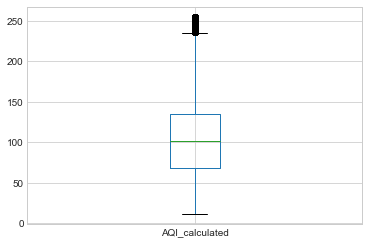

In [216]:
df.boxplot('AQI_calculated')

<AxesSubplot:xlabel='AQI_calculated'>

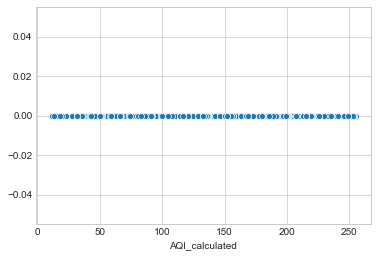

In [217]:
sns.scatterplot(x='AQI_calculated',y=np.zeros_like(df.AQI_calculated),data=df)

<AxesSubplot:xlabel='AQI_calculated'>

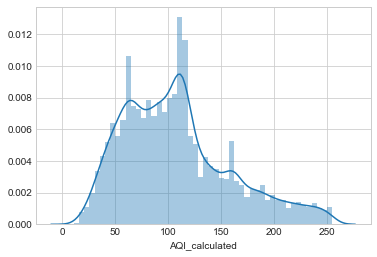

In [218]:
sns.distplot(df['AQI_calculated'])

In [219]:
df.to_csv('Data Preprocessing(city_by_day).csv',index=False)